In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [367]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

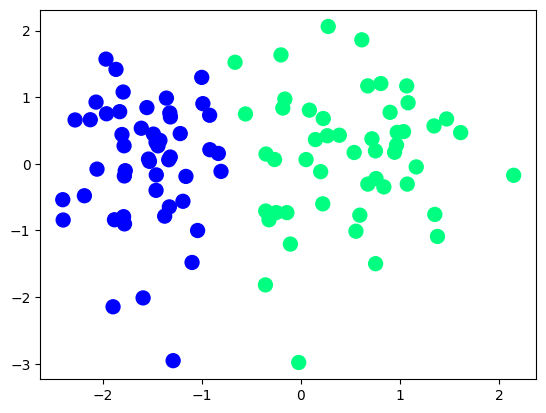

In [368]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [370]:
class perceptron:
    def __init__(self, epochs=1000, learning_rate=0.01):
      self.epoch = epochs
      self.learning_rate = learning_rate
      self.weights = None

    def fit(self, X_train, y_train):
      X_train = np.insert(X_train, 0, 1, axis=1)
      self.weights = np.zeros(X_train.shape[1])

      for i in range(self.epoch):
        for j in range(X_train.shape[0]):
          k = np.random.randint(0, X_train.shape[0])
          pred = self.step(np.dot(X_train[k], self.weights))
          self.weights = self.weights + self.learning_rate*((y_train[k]-pred)*X_train[k])

    def step(self, pred):
      return 1 if pred >= 0 else 0
    def predict(self, X_test):
      X_test = np.insert(X_test, 0, 1, axis=1)
      y_pred = []
      for i in range(X_test.shape[0]):
        pred = self.step(np.dot(X_test[i], self.weights))
        y_pred.append(pred)
      return np.array(y_pred)

In [371]:
per = perceptron(epochs=1, learning_rate=0.1)
per.fit(X_train, y_train)

In [372]:
y_pred = per.predict(X_test)

In [373]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1])

In [374]:
print(accuracy_score(y_test, y_pred))

1.0


In [375]:
intercept_ = per.weights[0]
coef_ = per.weights[1:]

In [376]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [377]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

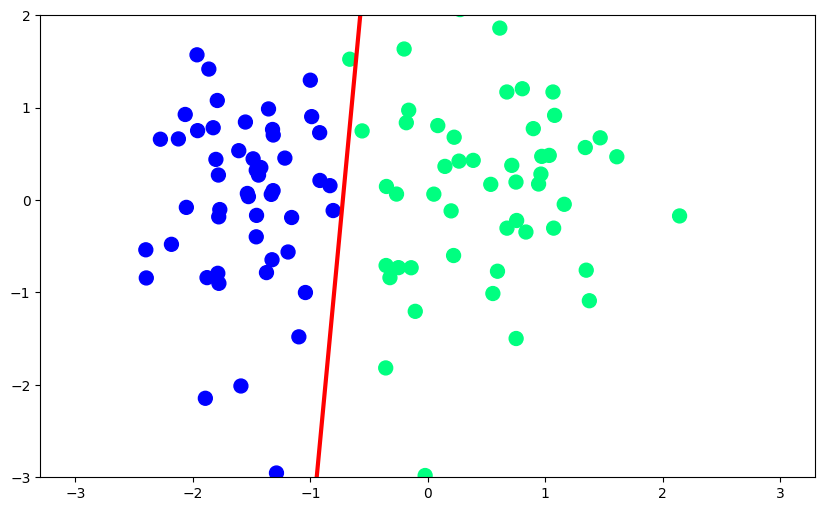

In [378]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)